# 🔬️ Laboratorio Modelos Ocultos de Markov
# 🌎️ Earthquake
(HMM)

En este cuaderno se va a realizar un ejemplo de HMM aplicado a *Identificación de probabilidad de terremotos*.

Este ejemplo, fué extraido y adapaptado de la colección de ejemplos de la [librería HMMLearn "Using HMM to Understand Earthquakes".🔗️](https://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_poisson_hmm.html)

In [ ]:
"""
Using a Hidden Markov Model with Poisson Emissions to Understand Earthquakes
----------------------------------------------------------------------------

Let's look at data of magnitude 7+ earthquakes between 1900-2006 in the
world collected by the US Geological Survey as described in this textbook:
Zucchini & MacDonald, "Hidden Markov Models for Time Series"
(https://ayorho.files.wordpress.com/2011/05/chapter1.pdf). The goal is to
see if we can separate out different tectonic processes that cause
earthquakes based on their frequency of occurance. The idea is that each
tectonic boundary may cause earthquakes with a particular distribution
of waiting times depending on how active it is. This might tell help us
predict future earthquake danger, espeically on a geological time scale.
"""

In [3]:
!pip install numpy pandas scikit-learn plotly matplotlib hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson
from hmmlearn import hmm

## 🔢️ Definición del dataset

Información extraida de http://earthquake.usgs.gov/ sobre la cantidad de terremotos que han habido según los años.

Text(0, 0.5, 'Count')

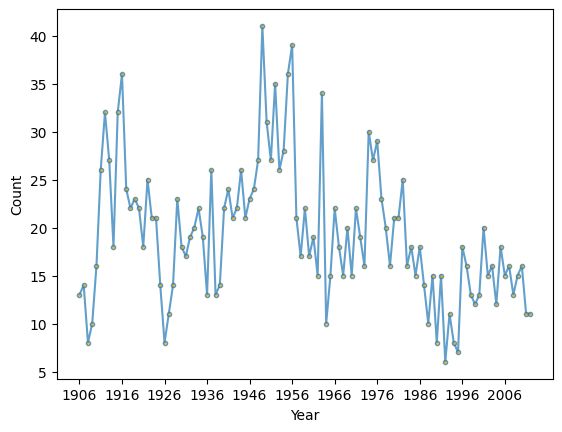

In [54]:
# earthquake data from http://earthquake.usgs.gov/
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(earthquakes, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, earthquakes.size, 10))
ax.set_xticklabels(range(1906, 2007, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')

## 🤖️ Entrenar y obtener el mejor modelo

In [55]:
# Now, fit a Poisson Hidden Markov Model to the data.

scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -341.89397049875356
Converged: True		Score: -341.88244772721345
Converged: True		Score: -342.1445482378539
Converged: True		Score: -341.8929674859702
Converged: True		Score: -341.88555381993297
Converged: True		Score: -342.28762276127696
Converged: True		Score: -342.53692921035895
Converged: True		Score: -341.88750207762115
Converged: True		Score: -341.8789363379968
Converged: True		Score: -342.9703881743695
Converged: True		Score: -343.04291690398713
Converged: True		Score: -342.0845203955179
Converged: True		Score: -342.6892743201992
Conv

# 🪄️ Clasificación y visualización

Text(0.5, 0, 'State')

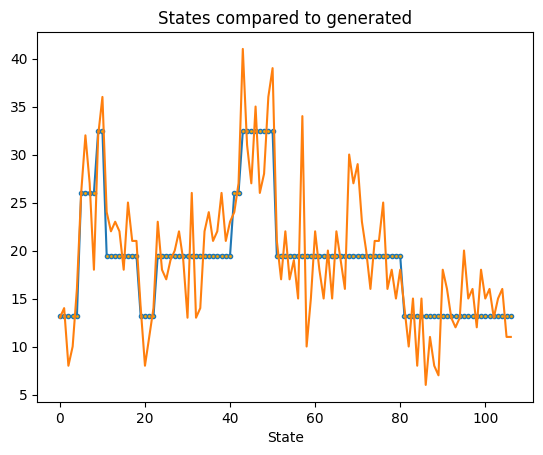

In [62]:
# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

# %%
# Let's plot the waiting times from our most likely series of states of
# earthquake activity with the earthquake data. As we can see, the
# model with the maximum likelihood had different states which may reflect
# times of varying earthquake danger.

# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_xlabel('State')

# 🎰️ Matriz de transición computada

Algoritmo de Baum-Welch

Emission Matrix Recovered:
[[0.914 0.045 0.038 0.003]
 [0.11  0.628 0.    0.262]
 [0.023 0.033 0.944 0.   ]
 [0.217 0.191 0.    0.593]]




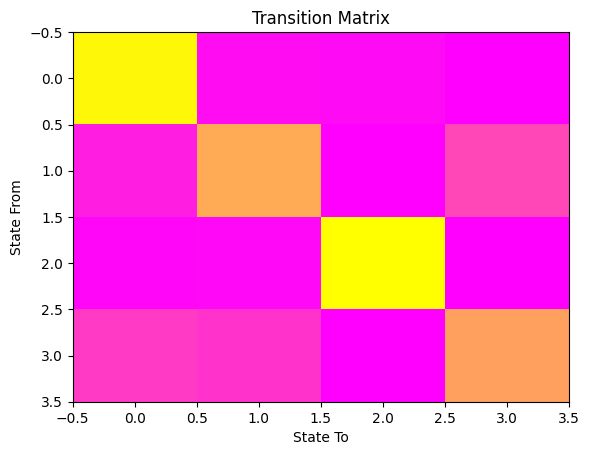

In [66]:
# %%
# Fortunately, 2006 ended with a period of relative tectonic stability, and,
# if we look at our transition matrix, we can see that the off-diagonal terms
# are small, meaning that the state transitions are rare and it's unlikely that
# there will be high earthquake danger in the near future.

fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

# Show values
print(f'Emission Matrix Recovered:\n{model.transmat_.round(3)}\n\n')

## 🗓️ Predicción de eventos

[Text(0, 0, '2007'),
 Text(1, 0, '2008'),
 Text(2, 0, '2009'),
 Text(3, 0, '2010'),
 Text(4, 0, '2011'),
 Text(5, 0, '2012'),
 Text(6, 0, '2013'),
 Text(7, 0, '2014'),
 Text(8, 0, '2015'),
 Text(9, 0, '2016')]

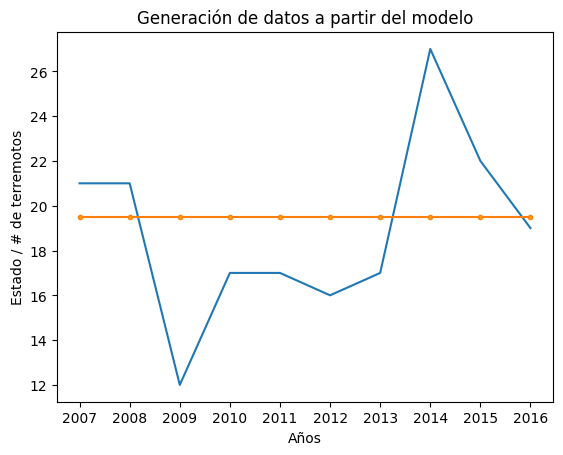

In [86]:
# simulate the next years

years = 10
rolls, gen_states = model.sample(years, currstate=0)
#rolls, gen_states = model.sample(120, currstate=states[-1])

# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(rolls[:years])
#ax.plot(gen_states[:years])
ax.plot(model.lambdas_[gen_states], ".-", ms=6, mfc="orange")
ax.set_title('Generación de datos a partir del modelo')
ax.set_xlabel('Años')
ax.set_ylabel('Estado / # de terremotos')
ax.set_xticks(range(0, years, 1))
ax.set_xticklabels(range(2007, 2007 + years, 1))

## 🎋️ Distribución

Text(0, 0.5, 'Proportion')

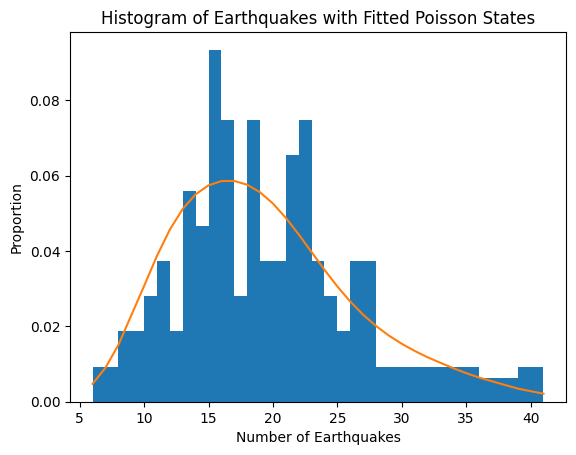

In [65]:
# Finally, let's look at the distribution of earthquakes compared to our
# waiting time parameter values. We can see that our model fits the
# distribution fairly well, replicating results from the reference.

# get probabilities for each state given the data, take the average
# to find the proportion of time in that state
prop_per_state = model.predict_proba(earthquakes[:, None]).mean(axis=0)

# earthquake counts to plot
bins = sorted(np.unique(earthquakes))

fig, ax = plt.subplots()
ax.hist(earthquakes, bins=bins, density=True)
ax.plot(bins, poisson.pmf(bins, model.lambdas_).T @ prop_per_state)
ax.set_title('Histogram of Earthquakes with Fitted Poisson States')
ax.set_xlabel('Number of Earthquakes')
ax.set_ylabel('Proportion')

## 📊️ Conclusión